In [2]:
import sys
import numpy as np
home_dir = '/depot/cms/top/jduarteq/top-spincorr-framework/src'
sys.path.insert(0, home_dir)
from entanglement_analysis import steering_utils
from entanglement_analysis import steering_analysis as steering
from uncertainties import unumpy as unp

# Load the file
data = np.load("/depot/cms/top/bhanda25/EFT_minitree/Deviation_from_sm/deviations_data.npz", allow_pickle=True)
parameter_value = data["parameter_value"].item()
parameter_sm_value = data["parameter_sm_value"].item()

ctGRe_values = np.linspace(-0.5, 0.5, 21)

# Function to calculate steerability including off-diagonal terms
def calculate_steerability(ckk, cnn, crr, ckn, ckr, cnr):
    CC = np.array([[ckk, ckn, ckr], 
                   [ckn, cnn, cnr], 
                   [ckr, cnr, crr]])  # Include off-diagonal terms
    return steering.steerability_condition(CC, math_module=np) / (2 * np.pi)

# Compute steerability for SM
steerability_sm = calculate_steerability(
    parameter_sm_value['$C_{kk}$'], parameter_sm_value['$C_{nn}$'], parameter_sm_value['$C_{rr}$'],
    parameter_sm_value['$C_{kn}$'], parameter_sm_value['$C_{kr}$'], parameter_sm_value['$C_{nr}$']
)

# Compute steerability for all ctGRe values and find deviation
steerability_values = []
steerability_deviation = []

limit_value = 1 - steerability_sm

for i in range(len(ctGRe_values)):
    S_ctGRe = calculate_steerability(
        parameter_value['$C_{kk}$'][i], parameter_value['$C_{nn}$'][i], parameter_value['$C_{rr}$'][i],
        parameter_value['$C_{kn}$'][i], parameter_value['$C_{kr}$'][i], parameter_value['$C_{nr}$'][i]
    )
    steerability_values.append(S_ctGRe)
    steerability_deviation.append(steerability_sm - S_ctGRe )


KeyError: '$C_{kr}$'

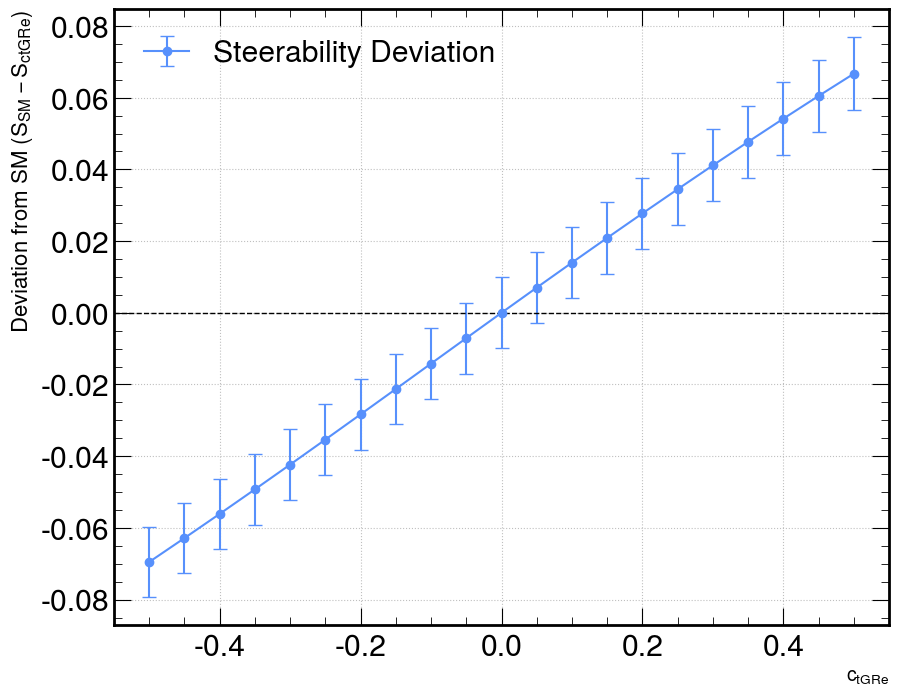

In [32]:
import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.style.CMS)
# Extract central values and uncertainties
central_values = unp.nominal_values(steerability_deviation)  # Get the nominal values
uncertainties = unp.std_devs(steerability_deviation)  # Get the uncertainties

# Plot with error bars
plt.figure(figsize=(10, 8))
plt.errorbar(ctGRe_values, central_values, yerr=uncertainties, fmt='o-', capsize=5, label="Steerability Deviation")

# Labels and title

plt.xlabel(r'$c_{tGRe}$', fontsize=14)
plt.ylabel('Deviation from SM ($S_{SM}-S_{ctGRe}$)', fontsize=16)
#plt.title('Steerability Deviation as a Function of $c_{tGRe}$', fontsize=16)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Reference line at zero
#plt.axhline(unp.nominal_values(limit_value), color='red', linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [1]:
central_values

NameError: name 'central_values' is not defined